# Homework set 2

Please **submit this Jupyter notebook through Canvas** no later than **Mon Nov. 14, 9:00**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. A pdf version can be made using the save and export option in the Jupyter Lab file menu.**

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Christos Perchanidis    (14601206)

River Vaudrin           (11877154)

Run the following cell to import some packages, add additional packages yourself when needed.

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import cond, norm, inv
from scipy.linalg import lu, lu_factor, lu_solve 

# Exercise 1

## (a) 1 point
Let $A$ be the matrix $\begin{bmatrix} 1 & -1 & \alpha \\ 2 & 2 & 1 \\ 0 & \alpha & -3/2 \end{bmatrix}$. For which values of $\alpha$ is $A$ singular?

**Answer:**

$A$ is singular if $det(A) = 0$.
$$det(A) = 1*(2*-\frac{3}{2} - 1*\alpha) - -1(2*-\frac{3}{2} - 1*0) + \alpha(2*\alpha - 2*0) = 0$$
$$det(A) = - 3 - \alpha - 3 + 2\alpha^2 = 0$$
$$det(A) = 2\alpha^2-\alpha-6=0$$
Now we can solve the quadratic equation to find values for $\alpha$:
$$\alpha=\frac{1\pm\sqrt{1-4*2*-6}}{2*2}=\frac{1\pm\sqrt{49}}{4}=\frac{1\pm7}{4}$$ 
Therefore, we have two solutions for the given quadratic equation:
$$\alpha=\frac{1+7}{4}=\frac{8}{4}=2$$
$$\alpha=\frac{1-7}{4}=\frac{-6}{4}=-1.5$$
Thus, for $\alpha=2$ and $\alpha=-1.5$, $A$ is a singular matrix, as its determinant is 0.

## (b) 1 point
For the largest value of $\alpha$ you found above, find a nonzero vector $b$ such that $Ax = b$ has infinitely many solutions. Explain your answer.

**Answer:**

As implied by the fact that the matrix $A$ is singular, it can either have infinitely many solutions or none. This depends on the amount of non-zero values in the vector $b$. Simply, its amount of non-zero elements must be same or less then the $span$ or $rank$ of the matrix $A$, $b \in span(A)$. To find the $rank(A)$ we have to find its reduced form (*Note: the highest value for $\alpha$ was 2*):
$$A=\begin{bmatrix} 1 & -1 & 2 \\ 2 & 2 & 1 \\ 0 & 2 & -3/2 \end{bmatrix}
    \stackrel{R_2=R_2-2R_1}{=}
    \begin{bmatrix} 1 & -1 & 2 \\ 0 & 4 & -3 \\ 0 & 2 & -3/2 \end{bmatrix}
    \stackrel{R_2=R_2/4}{=}
    \begin{bmatrix} 1 & -1 & 2 \\ 0 & 1 & -3/4 \\ 0 & 2 & -3/2 \end{bmatrix}
$$
$$
    \stackrel{R_1=R_1+R_2}{=}
    \begin{bmatrix} 1 & 0 & 5/4 \\ 0 & 1 & -3/4 \\ 0 & 2 & -3/2 \end{bmatrix}
    \stackrel{R_3=R_3-2R_2}{=}
    \begin{bmatrix} 1 & 0 & 5/4 \\ 0 & 1 & -3/4 \\ 0 & 0 & 0 \end{bmatrix}
$$
Thus, $rank(A) = 2$, and any vector $b=\begin{bmatrix} x \\ y \\ 0 \end{bmatrix}$, where $x$ or/and $y$ are non-zero will generate infinitely many solutions, for example if $b = \begin{bmatrix} 1 \\ -1 \\ 0 \end{bmatrix}$

# Exercise 2

For solving linear systems such as $Ax = b$, it is unnecessary (and often unstable) to compute the inverse $A^{-1}$. Nonetheless, there can be situations where it is useful to compute $A^{-1}$ explicitly. One way to do so is by using the LU-decomposition of $A$.

## (a) 2 points
Write an algorithm to compute $A^{-1}$ for a non-singular matrix $A$ using its LU-decomposition. You can use `scipy.linalg.lu` (which returns an LU-decomposition with _partial pivoting_, i.e., with a permutation matrix $P$) and the other `scipy.linalg.lu_*` functions, but not `scipy.linalg.inv` (or other methods for computing matrix inverses directly).

(Make sure to import the necessary functions/packages.)

In [98]:
def _invert(A):
    n = len(A)
    I = np.identity(n)
    
    # itterate over all rows
    for row1 in range(n):
        # find diagonal fraction
        d_frac = 1.0 / A[row1][row1]

        # multiply current row by its diagonal fraction for A and I
        for j in range(n):
            A[row1][j] *= d_frac
            I[row1][j] *= d_frac
       
        # find diagonal of current row
        operation_rows = [row if row != row1 else None for row in range(n)]
        for row2 in operation_rows:
            if row2 == None: continue # skip diagonal current row
            
            # find all vals that aren't the diagonal of current row 
            sub_val = A[row2][row1]
            
            # mulitply this value with its correspoonding value from the current row 
            # and subtract it from this value. For both A and I
            for col in range(n):
                A[row2][col] = A[row2][col] - sub_val * A[row1][col]
                I[row2][col] = I[row2][col] - sub_val * I[row1][col]

    # return I because it has become the inv(A)
    return I

def invert(A):
    # LU decomposition with pL calculated
    L,U = lu(A, permute_l=True)

    # find inverse of U and L
    U_inv = _invert(U)
    L_inv = _invert(L)

    # multiply these inverses to obtain inverse of A
    A_inv = np.dot(U_inv,L_inv)

    return A_inv

np.random.seed(42)
A = np.random.randint(0,4,(3,3))
print("A:\n {}\n".format(A))
print("numpy.linalg A^-1:\n{}".format(inv(A).round(3)))
print("\nLU-decomposition A^-1:\n{}".format(invert(A).round(3)))

A:
 [[2 3 0]
 [2 2 3]
 [0 0 2]]

numpy.linalg A^-1:
[[-1.    1.5  -2.25]
 [ 1.   -1.    1.5 ]
 [ 0.    0.    0.5 ]]

LU-decomposition A^-1:
[[-1.    1.5  -2.25]
 [ 1.   -1.    1.5 ]
 [ 0.    0.    0.5 ]]


## (b) 1 point
What is the computational complexity of your algorithm, given that the input matrix has size $n \times n$?
Give a short calculation/explanation for your answer.

**Answer:**

First of all we should start by describing what operations have been done. To find $A^{-1}$ we have to find $(LU)^{-1}$ or $U^{-1}L^{-1}$. We will not analyze complexity of finding the $LU$ decomposition as it was not the main point of the excercise, but we know that it is $(1/3)*n^3$ floating point multiplications and the same amount of additions. Thus, we have $2*2*(1/3)*n^3$ of operations plus a multiplication of a permutation matrix with the lower form matrix which is $n^3$ (assuming naive algorithm is used), which sums up to $7/3*n^3$.

To find $L$ and $U$ inverses we do multiple operations per each row. First, we find diagonal fraction, which is one division, afterwards we multiply matrix's row and identity matrix's row by the earlier found fraction, this operation is of complexity $n$ for each matrix. Thus, so far we have $1+2*n$ operations, because division and multiplication have same complexity. Afterwards for each row, except current one, we eliminate value in the rows of the same column by subtracting a multiple of a value in an upper diagonal cell. This creates a loop of $n-1$ which iterates over 2 matrices for $n-1$ column with 1 subtraction and 1 multiplication operations. Thus, making $(n-1)*(n-1)*(2*(1+1))$ operations or $(n^2-2n+1)*4 = 4n^2-8n+4$. Overall finding inverses of $L$ or $U$ sums up to $1+2*n + 4n^2 -8n + 4$ operations, or $4n^2 - 6n +5$ operations for each, overall $2*(4n^2 - 6n + 5)$. In general, we can say that our algorithm's complexity of finding inverse L and U is $O(n^2)$

Finally, we multiply obtained inverses of $L$ and $U$ with complexity of $n^3$ (Assuming again we are using the naive algorithm). Finally, summing all the performed actions we have $\frac{7}{3}n^3 + (8n^2 -12n +10) + n^3 = \frac{10}{3}n^3 + 8n^2 - 12n + 10$

# Exercise 3

## (a) (2 points) 
What happens when Gaussian elimination with partial pivoting is used on a matrix of the following form?
$$
  \begin{bmatrix}
     1 &  0 &  0 &  0 &  1 \\
    -1 &  1 &  0 &  0 &  1 \\
    -1 & -1 &  1 &  0 &  1 \\
    -1 & -1 & -1 &  1 &  1 \\
    -1 & -1 & -1 & -1 &  1 
  \end{bmatrix}
$$
Do the entries of the transformed matrix grow? What happens if complete pivoting is used instead? (Note that part (a) does not require a computer.)


**Answer:**

The given case is the worst possible one for the Guassian Elimination with partial pivoting, because last collumn will grow exponentially. It can be even said, that partial pivoting, does not offer any benefit here, as we will not interchange row, as only the last column is growing in value, and goes "under the radar" until the last moment. As can be seen easily from the calculations the increasing value in the last column is carried over each addition:
$$
  \begin{bmatrix}
     1 &  0 &  0 &  0 &  1 \\
    -1 &  1 &  0 &  0 &  1 \\
    -1 & -1 &  1 &  0 &  1 \\
    -1 & -1 & -1 &  1 &  1 \\
    -1 & -1 & -1 & -1 &  1 
  \end{bmatrix}
  \stackrel{R_2=R_2+R_1}{=}
  \begin{bmatrix}
     1 &  0 &  0 &  0 &  1 \\
     0 &  1 &  0 &  0 &  2 \\
    -1 & -1 &  1 &  0 &  1 \\
    -1 & -1 & -1 &  1 &  1 \\
    -1 & -1 & -1 & -1 &  1 
  \end{bmatrix}
  \stackrel{R_3=R_3+R_2+R_1}{=}
  \begin{bmatrix}
     1 &  0 &  0 &  0 &  1 \\
     0 &  1 &  0 &  0 &  2 \\
     0 &  0 &  1 &  0 &  4 \\
    -1 & -1 & -1 &  1 &  1 \\
    -1 & -1 & -1 & -1 &  1 
  \end{bmatrix}
  $$
  $$
  \stackrel{R_4=R_4+R_3+R_2+R_1}{=}
  \begin{bmatrix}
     1 &  0 &  0 &  0 &  1 \\
     0 &  1 &  0 &  0 &  2 \\
     0 &  0 &  1 &  0 &  4 \\
     0 &  0 &  0 &  1 &  8 \\
    -1 & -1 & -1 & -1 &  1 
  \end{bmatrix}
  \stackrel{R_5=R_5+R_4+R_3+R_2+R_1}{=}
  \begin{bmatrix}
     1 &  0 &  0 &  0 &  1 \\
     0 &  1 &  0 &  0 &  2 \\
     0 &  0 &  1 &  0 &  4 \\
     0 &  0 &  0 &  1 &  8 \\
     0 &  0 &  0 &  0 &  16 
  \end{bmatrix}
$$

However with complete pivoting this issue is solved as we can interchange columns too. As can be seen we will "correct" column with highest value on each step, so it will not blow out. However this comes at a high computational cost.
$$
  \begin{bmatrix}
     1 &  0 &  0 &  0 &  1 \\
    -1 &  1 &  0 &  0 &  1 \\
    -1 & -1 &  1 &  0 &  1 \\
    -1 & -1 & -1 &  1 &  1 \\
    -1 & -1 & -1 & -1 &  1 
  \end{bmatrix}
  \stackrel{R_2=R_2+R_1}{=}
  \begin{bmatrix}
     1 &  0 &  0 &  0 &  1 \\
     0 &  1 &  0 &  0 &  2 \\
    -1 & -1 &  1 &  0 &  1 \\
    -1 & -1 & -1 &  1 &  1 \\
    -1 & -1 & -1 & -1 &  1 
  \end{bmatrix}
  \stackrel{C_2 switch C_5}{=}
  \begin{bmatrix}
     1 &  1 &  0 &  0 &  1 \\
     0 &  2 &  0 &  0 &  1 \\
    -1 &  1 &  1 &  0 & -1 \\
    -1 &  1 & -1 &  1 & -1 \\
    -1 &  1 & -1 & -1 & -1 
  \end{bmatrix}
  $$
  $$
  \stackrel{R_2=R_2/2}{=}
  \begin{bmatrix}
     1 &  1 &  0 &  0 &  1 \\
     0 &  1 &  0 &  0 &  0.5 \\
    -1 &  1 &  1 &  0 & -1 \\
    -1 &  1 & -1 &  1 & -1 \\
    -1 &  1 & -1 & -1 & -1 
  \end{bmatrix}
  \stackrel{R_1=R_1-R_2}{=}
  \begin{bmatrix}
     1 &  0 &  0 &  0 &  0.5 \\
     0 &  1 &  0 &  0 &  0.5 \\
    -1 &  1 &  1 &  0 & -1 \\
    -1 &  1 & -1 &  1 & -1 \\
    -1 &  1 & -1 & -1 & -1 
  \end{bmatrix}
  \stackrel{R_3=R_3-R_2+R_1}{=}
  \begin{bmatrix}
     1 &  0 &  0 &  0 &  0.5 \\
     0 &  1 &  0 &  0 &  0.5 \\
     0 &  0 &  1 &  0 & -1 \\
    -1 &  1 & -1 &  1 & -1 \\
    -1 &  1 & -1 & -1 & -1 
  \end{bmatrix}
  $$
  $$
  \stackrel{R_4=R_4+R_3-R_2+R_1}{=}
  \begin{bmatrix}
     1 &  0 &  0 &  0 &  0.5 \\
     0 &  1 &  0 &  0 &  0.5 \\
     0 &  0 &  1 &  0 & -1 \\
     0 &  0 &  0 &  1 & -2 \\
    -1 &  1 & -1 & -1 & -1 
  \end{bmatrix}
  \stackrel{C_4 switch C_5}{=}
  \begin{bmatrix}
     1 &  0 &  0 & 0.5 &  0 \\
     0 &  1 &  0 & 0.5 &  0 \\
     0 &  0 &  1 & -1  &  0 \\
     0 &  0 &  0 & -2  &  1 \\
    -1 &  1 & -1 & -1  & -1 
  \end{bmatrix}
  \stackrel{R_4=R_4/(-2)}{=}
  \begin{bmatrix}
     1 &  0 &  0 & 0.5 &  0 \\
     0 &  1 &  0 & 0.5 &  0 \\
     0 &  0 &  1 & -1  &  0 \\
     0 &  0 &  0 &  1  &  -0.5 \\
    -1 &  1 & -1 & -1  & -1 
  \end{bmatrix}
  $$
  $$
  \stackrel{R_5=-2R_5-R_1+R_2-R3}{=}
  \begin{bmatrix}
     1 &  0 &  0 & 0.5 &  0 \\
     0 &  1 &  0 & 0.5 &  0 \\
     0 &  0 &  1 & -1  &  0 \\
     0 &  0 &  0 &  1  &  -0.5 \\
     0 &  0 &  0 &  0  & 1 
  \end{bmatrix}
$$
*Note: Permutation matrices are not provided as they took a lot of space and are not the point of this exercise.

## (b) (2 points)
Write a method that generates a matrix of the form of part (a) of size $n \times n$ for any $n$. Use a library routine for Gaussian elimination with partial pivoting to solve various sizes of linear systems of this form, using right-hand-side vectors chosen so that the solution is known. Try for example the case where the true solution is a vector of uniformly distributed random numbers between 0 and 1. How do the error, residual, and condition number behave as the systems become larger? Comment on the stability (see chapter 1) of Gaussian elimination with partial pivoting in this case.

N.B. This is an artificially contrived system that does not reflect the behavior of Gaussian elimination in realistic examples.

In [99]:
def get_matrix(n):
    A = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            # if diagonal
            if i == j:
                A[i][j] = 1
            # if last column
            elif j == n - 1:
                A[i][j] = 1
            # if under diagonal
            elif j < i:
                A[i][j] = -1
    return A

def test_matrix(A, p=False):
    n = len(A) 

    # problem with known solution 
    np.random.seed(42)
    xTrue = np.random.uniform(0,1,(n,1)) # true value of x (uniform distributed random vector)
    b = A @ xTrue

    # LU decomposition with partial pivoting
    lu, piv = lu_factor(A)
    xApprox = lu_solve((lu, piv), b)

    # condition number
    condN = cond(A, p=np.inf)
    # error
    error = norm(xApprox-xTrue)
    # residual
    res = norm(b - A @ xApprox)
    
    # print results
    if p: 
        print("Matrix A:\n", A)
        print("\nEvaluation:")
        print("cond(A): ", condN)
        print("error: ", error) 
        print("residual: ", res)

    return condN, error, res

n = 5
A = get_matrix(n)
evalResults = test_matrix(A, p=True)

Matrix A:
 [[ 1.  0.  0.  0.  1.]
 [-1.  1.  0.  0.  1.]
 [-1. -1.  1.  0.  1.]
 [-1. -1. -1.  1.  1.]
 [-1. -1. -1. -1.  1.]]

Evaluation:
cond(A):  5.0
error:  1.7554167342883506e-16
residual:  2.0014830212433605e-16


In [100]:
def simulate(N, trails):
    # initialize result lists
    conditionNums, errors, residuals = [], [], []
   
    # for every potential size of n
    for i, n in enumerate(N):
        # generate A -> nxn
        A = get_matrix(n)
        conditionNums.append([])
        errors.append([])
        residuals.append([])

        # evaluate A over an amount of trails
        for t in range(trails):
            evalResults = test_matrix(A)
            conditionNums[i].append(evalResults[0])
            errors[i].append(evalResults[1])
            residuals[i].append(evalResults[2])
    
    # average eval results over trails
    for i in range(len(N)):
        conditionNums[i] = sum(conditionNums[i]) / len(conditionNums[i])
        errors[i] = sum(errors[i]) / len(errors[i])
        residuals[i] = sum(residuals[i]) / len(residuals[i])

    return conditionNums, errors, residuals

N = [i for i in range(2,100)]
trails = 10
conditionNums, errors, residuals = simulate(N, trails)


These results were based on 10 trails per matrix size (nxn).


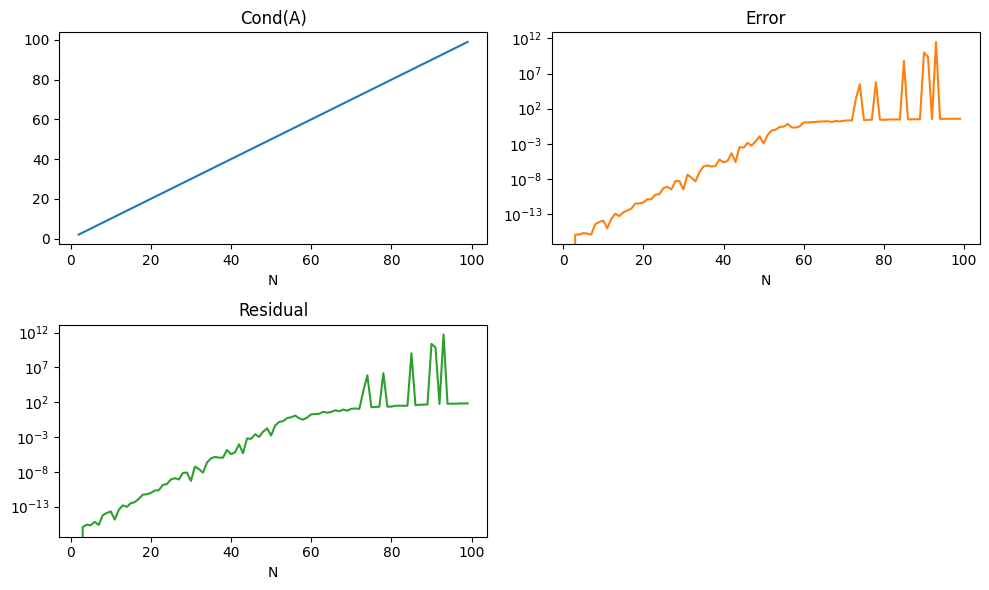

In [101]:
def plot_eval(N, trails, conditionNums, errors, residuals):
    print("These results were based on {} trails per matrix size (nxn).".format(trails))

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))  # define the figure and subplots
    axes = axes.ravel()  # array to 1D

    # plot condition number
    axes[0].plot(N,conditionNums,color='tab:blue')
    # axes[0].set_yscale('log')
    axes[0].set_title('Cond(A)')
    axes[0].set_xlabel('N')
    
    # plot errors
    axes[1].plot(N,errors,color='tab:orange')
    axes[1].set_yscale('log')
    axes[1].set_title('Error')
    axes[1].set_xlabel('N')

    # plot residuals
    axes[2].plot(N,residuals,color='tab:green')
    axes[2].set_yscale('log')
    axes[2].set_title('Residual')
    axes[2].set_xlabel('N')
        
    fig.delaxes(axes[3])  # delete the empty subplot
    fig.tight_layout()
    plt.show()

plot_eval(N, trails, conditionNums, errors, residuals)

**Answer:**

In the graph above we can see what happens to the condition number, the error and the residual, for solving a system of linear equations, $Ax=b$, with Gaussian elimination. We can see that when the matrix $A$ grows in size ($n$ increases), that the three evaluation values increase as well. The condition number of $A$ increases linearly along with the size ($n$) of $A$, thus when the size of $A$ is $100\times 100$, $cond(A)=100$. The error and residuals are plotted on a logaritmic y-scale, here we can see that both increase untill the size of $A$ reaches a size of roughly $n=60$, from here on the values plateau, with occasional spikes due to the randomly generated uniform true solution vector.
